In [80]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [81]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [83]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [85]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

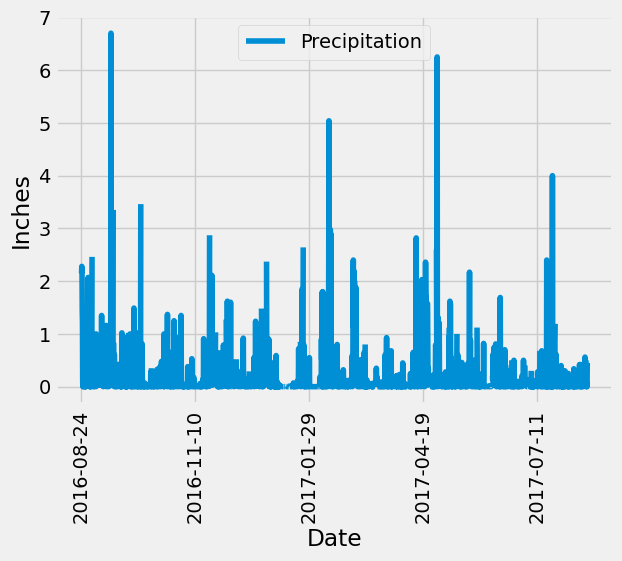

In [89]:
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
start_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
df_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(df_query, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation = precipitation.sort_values(['Date'], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot(x='Date', y='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches') 
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = precipitation.describe()
summary

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()
print(f'Total Stations: {total_stations}')

Total Stations: 9


In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactivestats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
mostactivestats

(54.0, 85.0, 71.66378066378067)

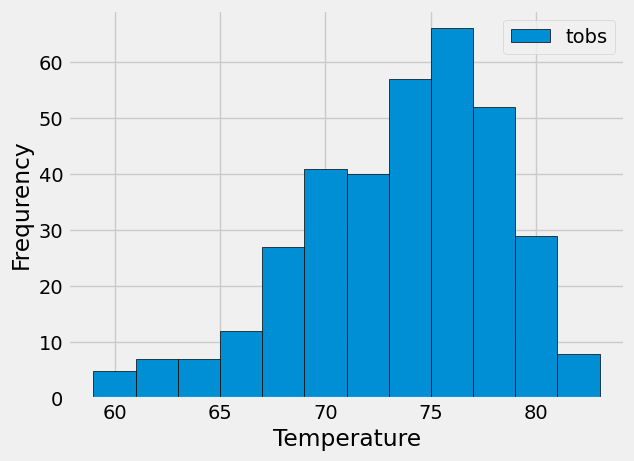

In [94]:
# Using the most active station id Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_no = active[0][0]
temp_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == station_no).\
    filter(measurement.date  >= start_date).all()

df_temp = pd.DataFrame(temp_data, columns=['Date', 'tobs'])

plt.hist(df_temp['tobs'], bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequrency')
plt.legend(['tobs'], loc='upper right')
plt.show()

# Close Session

In [95]:
# Close Session
session.close()